# Dataloader usage examples

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In this first example we are defining a dataloader that loads samples in chunks, ie given a full SAR products, it loads all the patches from one chunk at a time (```patch_order="chunk"```). 
The dataloader does also takes samples from the huggingface repository in case they were not found locally (```online = True```)

In [2]:
from dataloader import get_sar_dataloader


loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=16,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (1, 1000),
    buffer = (1000, 1000),
    stride = (1, 1000),
    shuffle_files = False,
    patch_order="chunk", 
    complex_valued = True,
    save_samples = False, 
    backend="zarr", 
    verbose=False, 
    samples_per_prod = 1000,
    cache_size = 1000, 
    online = True, 
    max_products = 20
)
for i, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {i}: x {x_batch.shape}, y {y_batch.shape}")

/Data/gdaga/anaconda3/envs/sar_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230731t121147-20230731t121217-049667-05f8f1.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240103t121147-20240103t121217-051942-0646ac.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240130t151239-20240130t151254-052337-06541b.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240517t151240-20240517t151255-053912-068d91.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240626t053141-20240626t053207-054490-06a193.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240825t053115-20240825t053148-055365-06c086.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20240830t121144-20240830t121215-055442-06c352.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20241005t121146-20241005t121216-055967-06d7fb.zarr'), PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20241008t151239-20241008t151255-056012-06d9c9.zarr'),

/Data/gdaga/anaconda3/envs/sar_env/lib/python3.13/site-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Successfully downloaded "s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/rcmc/zarr.json" to "/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/rcmc/zarr.json".
Files in s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/az: ['c', 'zarr.json']
Files in s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr: ['az', 'raw', 'rc', 'rcmc', 'zarr.json']
Files in s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/rcmc: ['c', 'zarr.json']
Successfully downloaded "s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/rcmc/c/0/0" to "/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr/rcmc/c/0/0".
Batch 0: x torch.Size([16, 1, 1001]), y torch.Size([16, 1, 1000])
Batch 1: x torch.Size([16, 1, 1001]), y torch.Size([16, 1, 1000])
Batch 2: x torch.Size([16, 1, 1001]), y torch.Size([16, 1, 1000])
Batch 3: x torch.Size([16, 1, 1001]), y torch.Size([16, 1, 100

In the following snippet we are just loading 10000 vertical samples from a single SAR product that had already been downloaded locally. Here the column order is chosen as the sampling strategy

In [3]:
from dataloader import get_sar_dataloader, SARTransform
import functools
from utils import normalize, RC_MIN, RC_MAX, GT_MIN, GT_MAX

transforms = SARTransform(
    transform_raw = functools.partial(normalize, array_min=RC_MIN, array_max=RC_MAX),
    transform_rc = functools.partial(normalize, array_min=RC_MIN, array_max=RC_MAX),
    transform_rcmc =functools.partial(normalize, array_min=RC_MIN, array_max=RC_MAX),
    transform_az = functools.partial(normalize, array_min=GT_MIN, array_max=GT_MAX)
)
loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=16,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (1, 1000),
    buffer = (1000, 1000),
    stride = (1, 300),
    transform=transforms,
    shuffle_files = False,
    patch_order="col", 
    complex_valued = True,
    save_samples = False, 
    backend="zarr", 
    verbose=True, 
    samples_per_prod = 10000,
    cache_size = 100, 
    online = False, 
    max_products=1
)
for i, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {i}: x {x_batch.shape}, y {y_batch.shape}")


Selected only files:  [PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Files list calculation took 0.00 seconds.
Zarr stores initialization took 2.03 seconds.
[PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1000, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1001, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1002, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1003, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1004, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw

In the following snippet we are just loading 2000 vertical samples from a single SAR product that had already been downloaded locally. Here the chunk order is chosen as the sampling strategy

In [4]:
from dataloader import get_sar_dataloader


loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=16,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (1, 1000),
    buffer = (1000, 1000),
    stride = (1, 300),
    transform=transforms,
    shuffle_files = False,
    patch_order="chunk", 
    complex_valued = True,
    save_samples = False, 
    backend="zarr", 
    verbose=True, 
    samples_per_prod = 2000,
    cache_size = 1000, 
    online = False, 
    max_products=1
)
for i, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {i}: x {x_batch.shape}, y {y_batch.shape}")


Selected only files:  [PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Files list calculation took 0.00 seconds.
Zarr stores initialization took 2.09 seconds.
[PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1000, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1001, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1002, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1003, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1004, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw

In the following snippet we are just loading 2000 vertical samples from a single SAR product that had already been downloaded locally. Here the row order is chosen as the sampling strategy

In [5]:
from dataloader import get_sar_dataloader


loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=16,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (1, 1000),
    buffer = (1000, 1000),
    stride = (1, 300),
    transform=transforms,
    shuffle_files = False,
    patch_order="chunk", 
    complex_valued = True,
    save_samples = False, 
    backend="zarr", 
    verbose=True, 
    samples_per_prod = 2000,
    cache_size = 1000, 
    online = False, 
    max_products=1
)
for i, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {i}: x {x_batch.shape}, y {y_batch.shape}")


Selected only files:  [PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Files list calculation took 0.00 seconds.
Zarr stores initialization took 2.00 seconds.
[PosixPath('/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr')]
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1000, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1001, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1002, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1003, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr, patch at (1004, 1000)
Sampling from file /Data/sar_focusing/s1a-s1-raw

In the example below we create a dataloader object that loads the patches as 2D real-valued patches, and loads horizontal patches as long as rows (notice the negative value in the horizontal patch size)

In [6]:
loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=16,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (1, -1),
    buffer = (0, 0),
    stride = (1, 300),
    transform=transforms,
    shuffle_files = False,
    patch_order="chunk", 
    complex_valued = False,
    save_samples = False, 
    backend="zarr", 
    verbose=True, 
    samples_per_prod = 1000,
    cache_size = 1000, 
    online = True, 
    max_products=1
)
for i, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {i}: x {x_batch.shape}, y {y_batch.shape}")

Found 396 files in the remote repository: '['s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr', 's1a-s1-raw-s-hh-20230731t121147-20230731t121217-049667-05f8f1.zarr', 's1a-s1-raw-s-hh-20240103t121147-20240103t121217-051942-0646ac.zarr', 's1a-s1-raw-s-hh-20240130t151239-20240130t151254-052337-06541b.zarr', 's1a-s1-raw-s-hh-20240517t151240-20240517t151255-053912-068d91.zarr', 's1a-s1-raw-s-hh-20240626t053141-20240626t053207-054490-06a193.zarr', 's1a-s1-raw-s-hh-20240825t053115-20240825t053148-055365-06c086.zarr', 's1a-s1-raw-s-hh-20240830t121144-20240830t121215-055442-06c352.zarr', 's1a-s1-raw-s-hh-20241005t121146-20241005t121216-055967-06d7fb.zarr', 's1a-s1-raw-s-hh-20241008t151239-20241008t151255-056012-06d9c9.zarr', 's1a-s1-raw-s-hh-20241125t151237-20241125t151253-056712-06f59c.zarr', 's1a-s1-raw-s-hh-20241219t151235-20241219t151251-057062-07037d.zarr', 's1a-s1-raw-s-hh-20250109t121141-20250109t121211-057367-070f7e.zarr', 's1a-s1-raw-s-hh-20250124t002434-20250124t0025

/Data/gdaga/anaconda3/envs/sar_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 396 files in the remote repository: '['s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr', 's1a-s1-raw-s-hh-20230731t121147-20230731t121217-049667-05f8f1.zarr', 's1a-s1-raw-s-hh-20240103t121147-20240103t121217-051942-0646ac.zarr', 's1a-s1-raw-s-hh-20240130t151239-20240130t151254-052337-06541b.zarr', 's1a-s1-raw-s-hh-20240517t151240-20240517t151255-053912-068d91.zarr', 's1a-s1-raw-s-hh-20240626t053141-20240626t053207-054490-06a193.zarr', 's1a-s1-raw-s-hh-20240825t053115-20240825t053148-055365-06c086.zarr', 's1a-s1-raw-s-hh-20240830t121144-20240830t121215-055442-06c352.zarr', 's1a-s1-raw-s-hh-20241005t121146-20241005t121216-055967-06d7fb.zarr', 's1a-s1-raw-s-hh-20241008t151239-20241008t151255-056012-06d9c9.zarr', 's1a-s1-raw-s-hh-20241125t151237-20241125t151253-056712-06f59c.zarr', 's1a-s1-raw-s-hh-20241219t151235-20241219t151251-057062-07037d.zarr', 's1a-s1-raw-s-hh-20250109t121141-20250109t121211-057367-070f7e.zarr', 's1a-s1-raw-s-hh-20250124t002434-20250124t0025

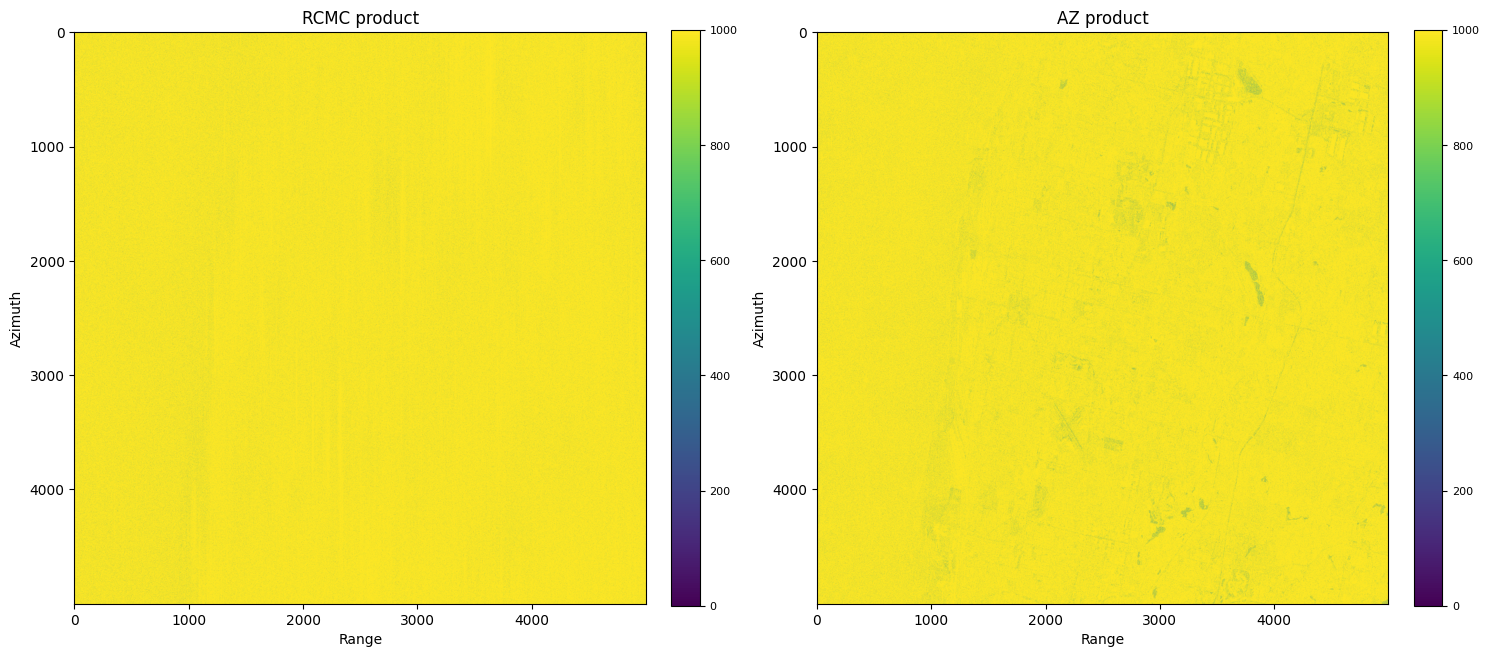

In [1]:
from dataloader import get_sar_dataloader

loader = get_sar_dataloader(
    data_dir="/Data/sar_focusing",
    level_from="rcmc",
    level_to="az",
    batch_size=1,
    num_workers=0,
    patch_mode="rectangular", 
    patch_size = (5000, 5000),
    buffer = (0, 0),
    stride = (1, 300),
    shuffle_files = False,
    patch_order="chunk", 
    complex_valued = True,
    save_samples = False, 
    backend="zarr", 
    verbose=True, 
    samples_per_prod = 1000,
    cache_size = 1000, 
    online = True, 
    positional_encoding=True,
    max_products=1
)
loader.dataset.visualize_item(["/Data/sar_focusing/s1a-s1-raw-s-hh-20230508t121142-20230508t121213-048442-05d3c0.zarr", 0, 0])